In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiment = "f"

In [3]:
filepath = os.path.join("input_data", experiment+".txt")
f = open(filepath)

In [4]:
first_line = f.readline()
vals = first_line.split(" ")
D = int(vals[0])
I = int(vals[1])
S = int(vals[2])
V = int(vals[3])
F = int(vals[4])
print("D={}, I={}, S={}, V={}, F={}".format(D,I,S,V,F))

D=1992, I=1662, S=10000, V=1000, F=500


In [5]:
# Create mapping streetname to id {"streetname": id}
mapping_streetnames = {}
inverse_mapping = []
i = 0;
while i < S:
    l = f.readline()
    vals = l.split(" ")
    B = int(vals[0])     # intersection beginning of the street
    E = int(vals[1])     # intersection end of the street
    name = vals[2]       # street name
    L = int(vals [3]) 
    mapping_streetnames[name] = i
    inverse_mapping.append(name)
    i += 1
 



In [6]:
# Create ranking how many times a street is part of a path.
ranking = np.zeros(S)

for j in range(V):
    l = f.readline()
    vals = l.split("\n")[0].split(" ")
    for i in range(1,int(vals[0])): # do not consider last street because last intersection isn't travelled through
        street_on_path = vals[i]
        ranking[mapping_streetnames[street_on_path]] += 1
        
    

In [7]:
#print(ranking)
#print(mapping_streetnames)
#print(inverse_mapping)

In [8]:
# save intersection ranking to csv file
with open(os.path.join("analysis", experiment+"_streets_stats.csv"), "w") as f:
    f.write("Street id ; Street name; number of cars driving along the street \n")
    for i in range(len(ranking)):
        f.write("{};{};{}\n".format(i, inverse_mapping[i], ranking[i]))


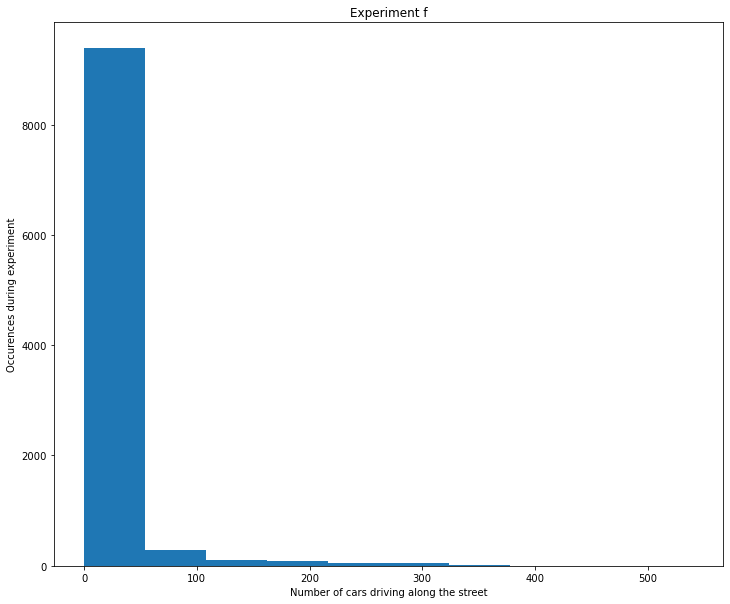

In [9]:
# create histogram
fig = plt.figure(figsize=(12, 10))
plt.hist(ranking)
plt.title("Experiment " + experiment)
plt.xlabel("Number of cars driving along the street")
plt.ylabel("Occurences during experiment")
#plt.show()
plt.savefig(os.path.join("analysis", experiment+"_streets_stats.png"))
